In [3]:
import simpy
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)

<h2 style="text-align: center; font-size: 30px; text-align: center; margin-bottom: 40px;">Trabajo Práctico 2</h2>

<div style="border: 1px solid #d2d2d2; border-top: none; border-radius: 8px; margin-bottom: 40px;">
    <h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #38a2ad; color: #fff; border-radius: 4px; margin-bottom: 20px; margin-top: 0; border-bottom-left-radius: 0;  border-bottom-right-radius: 0;">Alumnos</h2>
    <div style="width: 450px; margin: 0 auto 30px;">
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Nombre y Apellido</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 18px; font-weight: bold; color: #363636; line-height: 40px;">Padrón</p>
            </div>
        </div>
        <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Maria Florencia Prado</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">96626</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2; background-color: #f4f4f4;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Risaro Lucas</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">94335</p>
            </div>
        </div>
         <div style="overflow: hidden; border-bottom: 1px solid #d2d2d2;">
            <div style="float: left; width: 300px; padding-left: 8px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">Scoccimarro Maximiliano</p>
            </div>
            <div style="float: left; width: 150px;">
                <p style="font-family: 'Open Sans', sans-serif; font-size: 16px; color: #363636; line-height: 40px;">93784</p>
            </div>
        </div>
    </div>
</div>

<h2 style="text-align: center; font-weight: bold; font-size: 20px; padding: 10px 20px; background-color: #db2e2e; color: #fff; border-radius: 4px; margin-bottom: 30px;">Grupo 4</h2>

# Procesos de Poisson

### Ejercicio 1

Utilizando Matlab, Octave o Python simule el siguiente sistema.

Se está diseñando un web service, el cual cada vez que es invocado consulta a una base de datos.

Se estima que el tiempo que transcurre entre cada llamada al servicio se puede modelar según una distribución exponencial con media $\mu = 4$ *segundos*

Se debe decidir la arquitectura de base de datos a utilizar entre las dos siguientes:

1) Utilizar 2 bases de datos distribuidas.

Con probabilidad $p = 0.6$ las solicitudes son atendidas por la base 1 y con probabilidad $q=1-p$ son atendidos por la base de datos 2.

El tiempo que demora cada base de datos en atender una solicitud sigue una distribución exponencial con medias,  $\mu_1 = 0.7$ *segundos* y $\mu_1 = 1$ *segundos* respectivamente.

2) Utilizar 1 base de datos central. 

En este caso la demora en resolver una solicitud sigue una distribución exponencial con $\mu = 0.8$ *segundos*

Simular para cada opción 100000 solicitudes procesadas, determinando:
  * El tiempo medio de espera entre que la solicitud llega y puede ser procesada (suponer que ninguna conexión se cae por timeout).
  * La fracción de las solicitudes que no esperaron para ser procesadas. 
  * La opción 1 es más costosa que la segunda opción y la empresa sólo acepta realizar la inversión si el tiempo medio que demora en resolver cada solicitud (tiempo en fila + tiempo de procesamiento) es como mínimo 50% menor que la opción 2. ¿Qué solución le recomienda?

In [4]:
def serviceCall():
  return np.random.exponential(1/4)

def distributedDBProcessTime():
  if (np.random.rand() <= 0.6):
    return np.random.exponential(0.7)
  else:
    return np.random.exponential(1)

def centralDBProcessTime():
  return np.random.exponential(0.8)
  
def meanInstantProcessedServiceCalls(waitTimes):
  return waitTimes.count(0) / len(waitTimes)

def simulateWaitTimes(processFn, times):
  serviceCallTime = 0
  readyAtTime = 0
  waits = list()
  solves = list()

  for i in range(0, times):
    serviceCallTime += serviceCall()
    processTime = processFn()
    waitTime = readyAtTime - serviceCallTime

    if (waitTime > 0):
      waits.append(waitTime)
      solves.append(waitTime + processTime)
    else:
      waits.append(0)
      solves.append(processTime)

    readyAtTime = serviceCallTime + processTime

  return { "waitTimes": waits, "solveTimes": solves }

def getTimeDiffPercent(t1, t2):
  wt1 = np.mean(t1)
  wt2 = np.mean(t2)
  return wt1*100/wt2

distributedTimes = simulateWaitTimes(distributedDBProcessTime, 100000)
centralTimes = simulateWaitTimes(centralDBProcessTime, 100000)

print('Tiempo medio de espera - 2 bases de datos distribuidas', np.mean(distributedTimes["waitTimes"]))
print('Tiempo medio de espera - 1 base de datos central', np.mean(centralTimes["waitTimes"]))

print('Fracción de solicitudes que no esperaron para ser procesadas - 2 bases de datos distribuidas', meanInstantProcessedServiceCalls(distributedTimes["waitTimes"]))
print('Fracción de solicitudes que no esperaron para ser procesadas - 1 base de datos central', meanInstantProcessedServiceCalls(centralTimes["waitTimes"]))

print('Tiempo medio de resolucion - 2 bases de datos distribuidas', np.mean(distributedTimes["solveTimes"]))
print('Tiempo medio de resolucion - 1 base de datos central', np.mean(centralTimes["solveTimes"]))

td = getTimeDiffPercent(distributedTimes["solveTimes"], centralTimes["solveTimes"])
print('La opcion de 2 bases de datos distribuidas es', td, '% de la opcion de 1 base de datos central')
if (td >= 50):
  print('Por lo tanto recomiendo la opcion de 1 base de datos central')
else:
  print('Por lo tanto recomiendo la opcion de 2 bases de datos distribuidas')



Tiempo medio de espera - 2 bases de datos distribuidas 0.6283521838988122
Tiempo medio de espera - 1 base de datos central 0.6072755629029154
Fracción de solicitudes que no esperaron para ser procesadas - 2 bases de datos distribuidas 0.23995
Fracción de solicitudes que no esperaron para ser procesadas - 1 base de datos central 0.24083
Tiempo medio de resolucion - 2 bases de datos distribuidas 1.4467869463742062
Tiempo medio de resolucion - 1 base de datos central 1.4043008031054625
La opcion de 2 bases de datos distribuidas es 103.02543039032592 % de la opcion de 1 base de datos central
Por lo tanto recomiendo la opcion de 1 base de datos central


# Cadenas de Markov

### Ejercicio 2

Un servidor recibe solicitudes las cuales son procesadas de una por vez en el orden de llegada (política FIFO).

Se determinó que en 10 *milisegundos* existe una probabilidad $p = \frac{1}{40}$ que llegue una nueva solicitud y una probabilidad $q = \frac{1}{30}$ que una solicitud termine de ser procesada y deje el sistema.

Se desea estudiar la cantidad de solicitudes en el servidor considerando tanto las que están en cola esperando ser procesadas como la solicitud que está siendo procesada.

1)  Determine la matriz de transición de estados explicando cómo se obtiene la misma.

2)  Utilizando Matlab, Octave o Python simule la evolución del sistema a lo largo de 1.000 segundos. Suponga que el sistema puede tener como máximo 30 estados posibles y que el servidor comienza sin estar procesando solicitudes.

3)  Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.

4)  Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado.

5)  Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes.

### Matriz de transición de estados

Para obtener la matriz de transición de estados, consideramos como estados a la cantidad de solicitudes en el servidor, de la siguiente manera:

p00 = probabilidad de pasara de tener 0 a 0 solicitudes en el servidor

p01 = probabilidad de pasar de tener 0 a 1 solicitudes en el servidor

p10 = probabilidad de pasar de tener 1 a 0 solicitudes en el servidor

...

pij = probabilidad de pasar de tener i a j solicitudes en el servidor

P("no llega nueva solicitud" ^ "termina de ser procesada una solicitud") = 39/40 * 1/30 = 13/400

P("no llega nueva solicitud" ^ "no termina de ser procesada una solicitud") = 39/40 * 29/30 = 377/400


#### Matriz de transición para n estados posibles:

[39/40 1/40 0 0 0 .............. 0]

[13/400 377/400 1/40 0 0 0 ..... 0]

[0 13/400 377/400 1/40 0 0 0 ... 0]

[.................................]

[0 0 0 ................ 1/30 29/30]


In [10]:
def getRow(len):
    row = []
    for i in range(0, len):
        row.append(0)
    return row

def getTransitionMatrix():
    mat = []
    row = getRow(30)
    row[0] = 39/40
    row[1] = 1/40
    mat.append(row)
    for i in range(0, 28):
        row = getRow(30)
        row[i] = 13/400
        row[i+1] = 377/400
        row[i+2] = 1/40
        mat.append(row)

    row = getRow(30)
    row[len(row)-1] = 29/30
    row[len(row)-2] = 1/30
    mat.append(row)
    
    return np.matrix(mat)

nmat = getTransitionMatrix()
print(nmat)

# Empieza esperando
currentState = getRow(30)
currentState[0] = 1


#######################################################################################################################
# Codigo anterior
#######################################################################################################################
p = np.matrix([[113/120, 1/40, 1/30], [1, 0, 0], [1, 0, 0]])
stateChangeQ = round((1000 * 1000) / 10)

# Empieza esperando
currentState = [1, 0, 0]
stateCount = [0, 0, 0]
solCount = 0
stateNum = 1
solTime = 0
stateChangeCount = 0
solT = [[], []]
for i in range(0, stateChangeQ):
  print('En estado ', stateNum, ':')
  stateCount[stateNum-1] += 1
  print(solCount, ' solicitudes en cola a los ', i*10, ' milisegundos')
  d = np.matmul(currentState, p**(i+1))
  probValues = d.tolist()[0]
  prob = np.random.uniform(0, 1)
  # print(probValues)
  prevStateNum = stateNum
  if (prob <= probValues[0]):
    stateNum = 1
    currentState = [1, 0, 0]
    solTime += 10
  elif (prob <= (probValues[0] + probValues[1])):
    stateNum = 2
    currentState = [0, 1, 0]
    solCount += 1
    solTime += 10
  elif (solCount > 0):
    stateNum = 3
    currentState = [0, 0, 1]
    if (solCount > 0):
      solCount -= 1
  else:
    stateNum = 1
    currentState = [1, 0, 0]
    solTime += 10
  print('')
  solT[0].append(i*10)
  solT[1].append(solCount)
  if (prevStateNum != stateNum):
    stateChangeCount += 1
  if (stateChangeCount == 30):
    print('Se llego al limite de cambios de estado posibles (30)')
    print('Cantidad de veces en cada estado', stateCount)
    print('Porcentaje de tiempo que el servidor no procesa solicitudes ', (solTime / ((i+10)*10))*100, '%')
    break
if (stateChangeCount < 30):
  print('Cantidad de veces en cada estado', stateCount)
  print('Porcentaje de tiempo que el servidor no procesa solicitudes ', (solTime / (stateChangeQ*10))*100, '%')

[[0.975      0.025      0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.0325     0.9425     0.025      0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.0325     0.9425     0.025      0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.0325     0.9425     0.025      0.
  0.         

0  solicitudes en cola a los  1890  milisegundos

En estado  1 :
0  solicitudes en cola a los  1900  milisegundos

En estado  1 :
0  solicitudes en cola a los  1910  milisegundos

En estado  1 :
0  solicitudes en cola a los  1920  milisegundos

En estado  1 :
0  solicitudes en cola a los  1930  milisegundos

En estado  1 :
0  solicitudes en cola a los  1940  milisegundos

En estado  1 :
0  solicitudes en cola a los  1950  milisegundos

En estado  1 :
0  solicitudes en cola a los  1960  milisegundos

En estado  1 :
0  solicitudes en cola a los  1970  milisegundos

En estado  1 :
0  solicitudes en cola a los  1980  milisegundos

En estado  1 :
0  solicitudes en cola a los  1990  milisegundos

En estado  1 :
0  solicitudes en cola a los  2000  milisegundos

En estado  1 :
0  solicitudes en cola a los  2010  milisegundos

En estado  1 :
0  solicitudes en cola a los  2020  milisegundos

En estado  1 :
0  solicitudes en cola a los  2030  milisegundos

En estado  1 :
0  solicitudes en cola a 

En estado  1 :
0  solicitudes en cola a los  4390  milisegundos

En estado  1 :
0  solicitudes en cola a los  4400  milisegundos

En estado  1 :
0  solicitudes en cola a los  4410  milisegundos

En estado  1 :
0  solicitudes en cola a los  4420  milisegundos

En estado  1 :
0  solicitudes en cola a los  4430  milisegundos

En estado  1 :
0  solicitudes en cola a los  4440  milisegundos

En estado  1 :
0  solicitudes en cola a los  4450  milisegundos

En estado  1 :
0  solicitudes en cola a los  4460  milisegundos

En estado  1 :
0  solicitudes en cola a los  4470  milisegundos

En estado  1 :
0  solicitudes en cola a los  4480  milisegundos

En estado  1 :
0  solicitudes en cola a los  4490  milisegundos

En estado  1 :
0  solicitudes en cola a los  4500  milisegundos

En estado  1 :
0  solicitudes en cola a los  4510  milisegundos

En estado  1 :
0  solicitudes en cola a los  4520  milisegundos

En estado  1 :
0  solicitudes en cola a los  4530  milisegundos

En estado  1 :
0  solicit

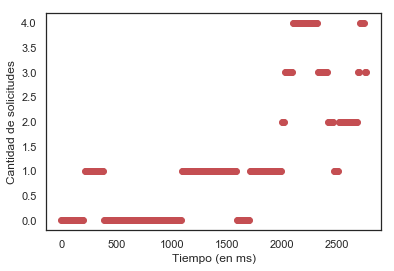

In [4]:
plt.plot(solT[0], solT[1], 'ro')
plt.xlabel('Tiempo (en ms)')
plt.ylabel('Cantidad de solicitudes')
plt.show()

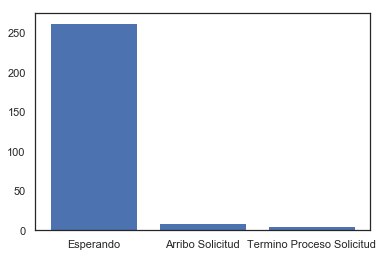

In [5]:
names = ['Esperando', 'Arribo Solicitud', 'Termino Proceso Solicitud']
values = stateCount

fig, ax = plt.subplots()
ax.bar(names, values)
plt.show()

# Sistemas Dinámicos

### Ejercicio 3

Se tiene un sistema el cual depende de 3 variables y se puede suponer discreto en el tiempo. Su comportamiento está regido por las siguientes reglas:

<h4 align="center">
$2x_t = x_{t-1} + 2 y_{t-1}$
</h4>
<h4 align="center">
$y_t = y_{t-1} - \frac{x_{t-1}}{2}$
</h4>
<h4 align="center">
$z_t = z_{t-1} - (x_{t-1} + y_{t-1})$
</h4>

* Determine el o los puntos de equilibrio del sistema.
* Grafique el diagrama de fases mostrando 100 iteraciones del sistema considerando como puntos de inicio todos
los puntos que se puede formar con:
<h4 align="center">
$x_0 =  \text{-1, 0 y 1}$
</h4>
<h4 align="center">
$y_0 =  \text{-1, 0 y 1}$
</h4>
<h4 align="center">
$z_0 =  \text{-1, 0 y 1} $
</h4>

---

Primero buscamos los puntos de equilibrio:

<h4 align="center">
$2x_{eq} = x_{eq} + 2 y_{eq}$
</h4>
<h4 align="center">
$y_{eq} = y_{eq} - \frac{x_{eq}}{2}$
</h4>
<h4 align="center">
$z_{eq} = z_{eq} - (x_{eq} + y_{eq})$
</h4>

Reemplazando:

<h4 align="center">
$2x_{eq} = x_{eq} + 2 y_{eq}$
</h4>
<h4 align="center">
$y_{eq} = y_{eq} - \frac{x_{eq}}{2}$
</h4>
<h4 align="center">
$z_{eq} = z_{eq} - x_{eq} - y_{eq}$
</h4>

<h4 align="center">
$x_{eq} = 2 y_{eq}$
</h4>
<h4 align="center">
$x_{eq} = 0, \quad y_{eq} = 0$
</h4>

Por lo tanto, los puntos de equilibrio del sistema son:

<h4 align="center">
$(x_{eq},y_{eq},z_{eq}) = (0, 0, z_{eq}) \quad \forall  z_{eq} \in \Re$
</h4>

In [6]:
xs = list()
ys = list()
zs = list()

def dinSystem(p, times):
    o = p
    for i in range(0, times):
        x = (o[0] + 2*o[1]) / 2
        y = o[1] - o[0]/2
        z = o[2] - o[0] - o[1]
        o = [x, y, z]
        xs.append(x)
        ys.append(y)
        zs.append(z)

x = [-1, 0, 1]
y = [-1, 0, 1]
z = [-1, 0, 1]

points = list()

for i in x:
    for j in y:
        for u in z:
            currentP = [x[i], y[j], z[u]]
            points.append(currentP)
            print("Calculando iteraciones para: ",currentP)
            o = dinSystem(currentP, 100)

Calculando iteraciones para:  [1, 1, 1]
Calculando iteraciones para:  [1, 1, -1]
Calculando iteraciones para:  [1, 1, 0]
Calculando iteraciones para:  [1, -1, 1]
Calculando iteraciones para:  [1, -1, -1]
Calculando iteraciones para:  [1, -1, 0]
Calculando iteraciones para:  [1, 0, 1]
Calculando iteraciones para:  [1, 0, -1]
Calculando iteraciones para:  [1, 0, 0]
Calculando iteraciones para:  [-1, 1, 1]
Calculando iteraciones para:  [-1, 1, -1]
Calculando iteraciones para:  [-1, 1, 0]
Calculando iteraciones para:  [-1, -1, 1]
Calculando iteraciones para:  [-1, -1, -1]
Calculando iteraciones para:  [-1, -1, 0]
Calculando iteraciones para:  [-1, 0, 1]
Calculando iteraciones para:  [-1, 0, -1]
Calculando iteraciones para:  [-1, 0, 0]
Calculando iteraciones para:  [0, 1, 1]
Calculando iteraciones para:  [0, 1, -1]
Calculando iteraciones para:  [0, 1, 0]
Calculando iteraciones para:  [0, -1, 1]
Calculando iteraciones para:  [0, -1, -1]
Calculando iteraciones para:  [0, -1, 0]
Calculando ite

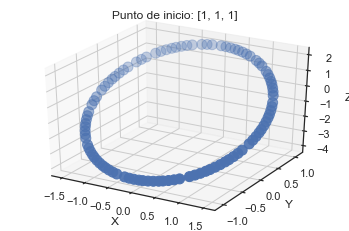

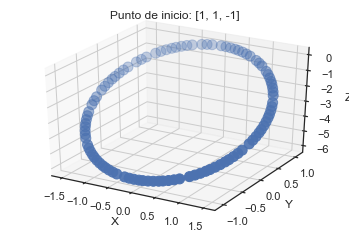

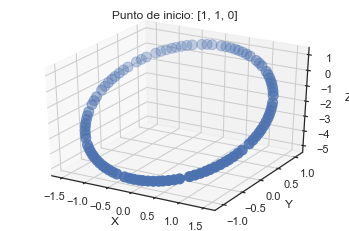

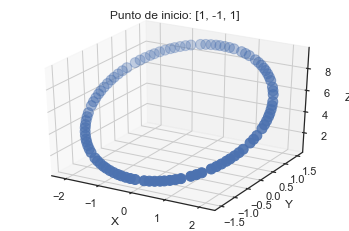

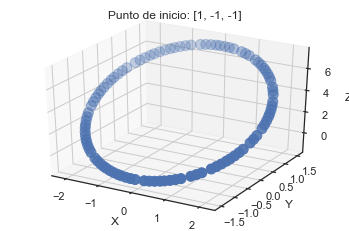

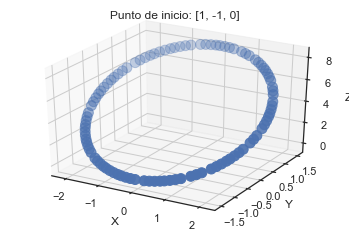

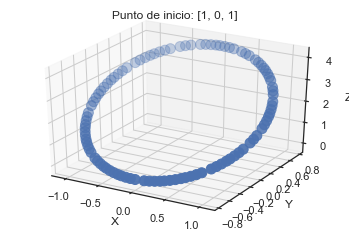

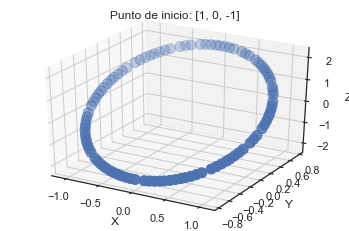

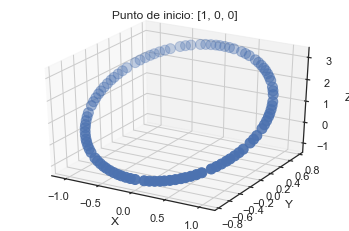

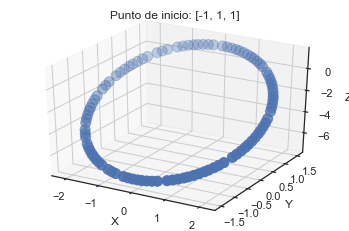

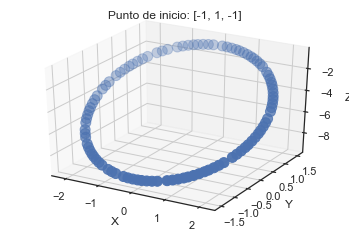

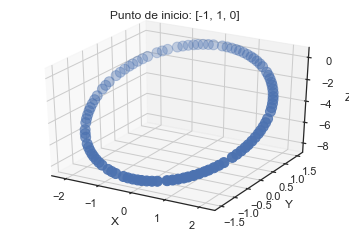

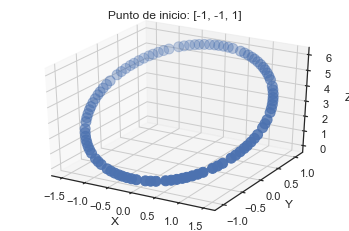

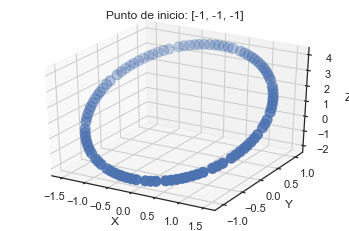

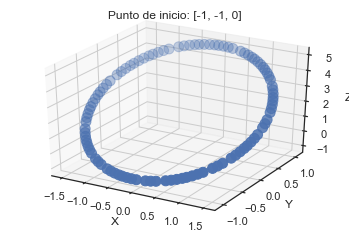

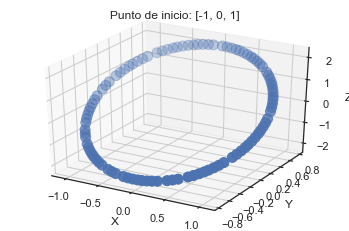

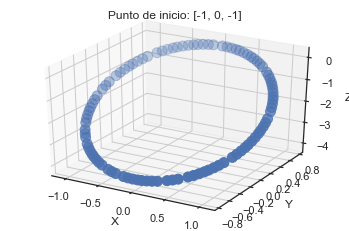

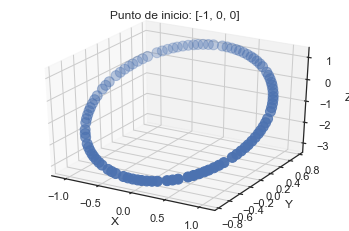

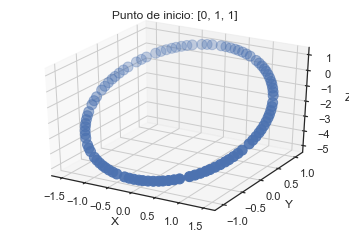

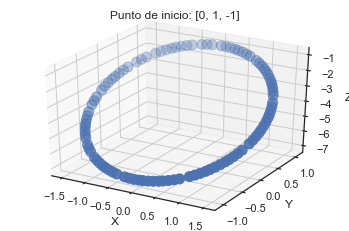

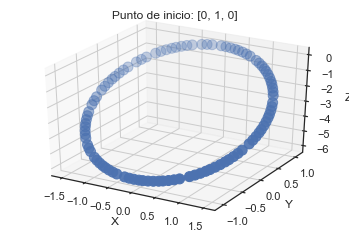

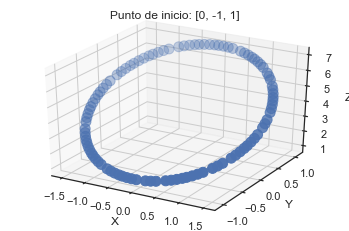

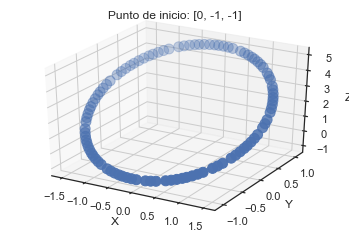

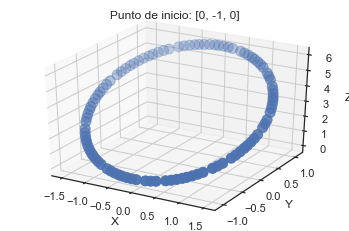

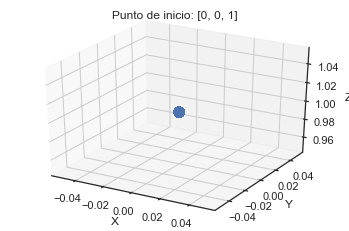

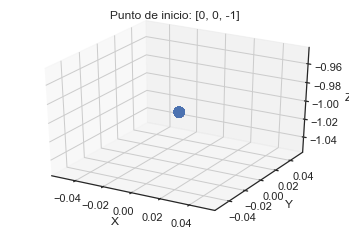

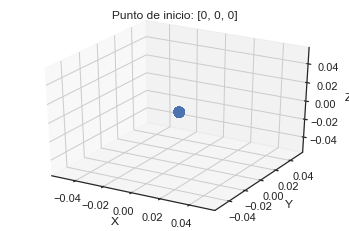

In [7]:
for i in range(len(points)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs[(i*100):((i+1)*100)], ys[(i*100):((i+1)*100)], zs[(i*100):((i+1)*100)], s=100, marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("Punto de inicio: " + str(points[i]))
    plt.show()

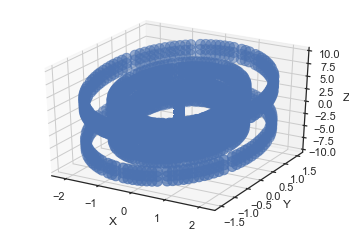

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, s=100, marker='o')

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')

plt.show()

# Simpy

### Ejercicio 4

A un cajero automático (ATM) arriban clientes según una distribución exponencial con media que depende del horario según la siguiente tabla:

| Hora desde | Hora hasta  | Media (seg) 
|--|
| 10:00 | 12:00| 240
| 12:00 | 15:00| 120
| 15:00 | 19:00| 360

Los clientes se pueden dividir en tres tipos, y en función de ello es el tiempo que utilizan el cajero

| Tipo | Probabilidad  | Tiempo de proceso (min) 
|--|
| 1 | .1| 4 +/- 3
| 2 | .7| 2 +/- 1
| 3 | .2| 3 +/- 2

Determine:

* La cantidad máxima de personas en fila esperando a usar el ATM
* Tiempo máximo de espera en fila



In [9]:
simulation_time = 7*60*60
queue = 0
queue_max = 0
last_time_atention = 0
atention_max_time = 0


def get_lambda(env):
    if(env.now <= 2*60*60):
        return 1/240
    elif(env.now <= 5*60*60):
        return 1/120
    elif(env.now <= 7*60*60):
        return 1/360
    
def atention_duration():
    u = np.random.uniform()
    if(u <= 0.1):
        return np.random.uniform(1,7) * 60
    elif(u <= 0.8):
        return np.random.uniform(1,3) * 60
    return np.random.uniform(1,5) * 60
    
def cashier(env):
    global queue
    index = 1
    atm = simpy.Resource(env, capacity=1)
    while True:
        clients_arrival = random.expovariate(get_lambda(env))
        yield env.timeout(clients_arrival)
        #print('llega un cliente')
        queue +=1
        #print('cola en el cajero', queue)
        env.process(atention(env, index, atm))
        index +=1

def atention(env, index, atm):
    global queue, queue_max, last_time_atention, atention_max_time
    request = atm.request()
    yield request
    duration =  atention_duration()
    yield env.timeout(duration)
    atm.release(request)
    #print('Termina de usar el cajero')
    
    #Chuequeo la cola maxima
    if queue > queue_max: queue_max = queue
    
    #print('cola antes de atender al cliente:', queue)
    queue -= 1
    #print("Cola despues de la atencion:", queue)
    
    #Chequeo la cantidad maxima de espera
    if (round(env.now/60, 2) - last_time_atention > atention_max_time):
        atention_max_time = round(env.now/60, 2) - last_time_atention
        last_time_atention = round(env.now/60, 2)
    
environment = simpy.Environment()
environment.process(cashier(environment))
environment.run(until=simulation_time)

print('\nLa cola maxima que se formo fue de ' + str(queue_max) + ' personas.')
print('El tiempo maximo de espera de un cliente en la fila fue ' + str(round(atention_max_time, 2)) + ' minutos.')


La cola maxima que se formo fue de 32 personas.
El tiempo maximo de espera de un cliente en la fila fue 47.9 minutos.


### Ejercicio 5

Siguiendo una distribución Exponencial negativa de media 45 ms arriban solicitudes a una granja de servidores, compuesta por 5 servidores y un balanceador de carga.

El tiempo de procesamiento de cada solicitud dependerá del tipo de solicitud que se trate:

| Tipo | Probabilidad  | Tiempo de proceso (mseg) 
|--|
| A | .7| 120 +/- 60
| B | .2| 240 +/- 120
| C | .1| 500 +/- 300

Se necesita determinar la mejor política de asignación de procesos a utilizar en el balanceador entre las siguientes:
* Cada solicitud recibida se asigna al servidor que esté desocupado, y de no haber alguno libre la asignación se hace al que posee menos solicitudes en cola de espera.
* Utilizando una política Round Robin (la primer solicitud se asigna al servidor 1, la segunda al 2, etc).
(Justifique la respuesta midiendo todos los indicadores que considere necesarios)

In [10]:
max_waitting_time = 0

class Request(object):

    def __init__(self, env):
        self.env = env
        self.arrival_time = self.env.now
        self.type = np.random.choice(['A', 'B', 'C'], p=[0.7, 0.2, 0.1])

    def update_max_waiting_time(self, attendant_time):
        global max_waitting_time
        waiting_time = attendant_time - self.get_process_duration() - self.arrival_time
        if (waiting_time > max_waitting_time):
            max_waitting_time = waiting_time

    def process(self, farm):
        yield self.env.process(farm.serve(self))
        self.update_max_waiting_time(self.env.now)
        print("%.2f Request tipo %s fue atendido" % (self.env.now, self.type))

    def get_process_duration(self):
        if(self.type == 'A'):            
            return np.random.uniform(60,180)
        elif(self.type == 'B'):
            return np.random.uniform(120,360)
        return np.random.uniform(200,800)
        
class Farm(object):
    def __init__(self, env, count):
        self.env = env
        self.count = count
        self.servers = [simpy.Resource(env) for x in range(count)]
        self.queues_max = 0
        
    def serve(self, request):
        server = self.select_server()
        with server.request() as req:
            yield req
            yield self.env.timeout(request.get_process_duration())

    def select_server(self):
        queues = [0,0,0,0,0]
        servers_state = ['LIBRE','LIBRE','LIBRE','LIBRE','LIBRE']
        
        for i in range(len(self.servers)):
            server = self.servers[i]
            server_state = server.count
            if (server_state == 0) and (len(server.queue) == 0):
                print("Estado de servidores: " + str(servers_state))
                print(str(round(env.now, 2))+ "ms - Libre servidor: "+ str(i + 1) + " Colas: "+ str(queues))
                print("Servidor designado: " + str(i + 1))
                return server
            else:
                if(server_state == 1):
                    servers_state[i] = 'OCUPADO'
                queues[i]+=(len(server.queue))
                
        server_dessignated = np.array(queues).argmin()
        print("Estado de servidores: " + str(servers_state))
        print(str(round(env.now, 2))+ "ms - Libre servidor: "+ str(server_dessignated + 1) + " Colas: "+ str(queues))
        print("Servidor designado: " + str(server_dessignated + 1))
        
        if(np.amax(queues) > self.queues_max): 
            self.queues_max = np.amax(queues)
        
        return self.servers[server_dessignated]


In [11]:
request_count = 500
arrival_rate = 45
server_count = 5

def generate_request(environment, count, interval, farm):
    for i in range(count):
        request = Request(env)
        print(str(round(env.now, 2)) + "ms - Arribo de request tipo: " + request.type)
        environment.process(request.process(farm))
        t = random.expovariate(1.0 / interval)
        yield environment.timeout(t)


env = simpy.Environment()
farm = Farm(env, server_count)
env.process(generate_request(env, request_count, arrival_rate, farm))
env.run()

0ms - Arribo de request tipo: C
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
0ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
0.49ms - Arribo de request tipo: C
Estado de servidores: ['OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
0.49ms - Libre servidor: 2 Colas: [0, 0, 0, 0, 0]
Servidor designado: 2
123.14ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE']
123.14ms - Libre servidor: 3 Colas: [0, 0, 0, 0, 0]
Servidor designado: 3
184.15ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE']
184.15ms - Libre servidor: 4 Colas: [0, 0, 0, 0, 0]
Servidor designado: 4
191.63ms - Arribo de request tipo: C
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE']
191.63ms - Libre servidor: 5 Colas: [0, 0, 0, 0, 0]
Servidor designado: 5
201.87ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPA

9614.0ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9614.0ms - Libre servidor: 4 Colas: [1, 1, 1, 0, 0]
Servidor designado: 4
9649.98ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9649.98ms - Libre servidor: 5 Colas: [1, 1, 1, 1, 0]
Servidor designado: 5
9673.16 Request tipo A fue atendido
9680.55ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9680.55ms - Libre servidor: 5 Colas: [1, 1, 1, 1, 0]
Servidor designado: 5
9699.38ms - Arribo de request tipo: C
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9699.38ms - Libre servidor: 1 Colas: [1, 1, 1, 1, 1]
Servidor designado: 1
9727.38ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
9727.38ms - Libre servidor: 2 Colas: [2, 1, 1, 1, 1]
Servidor designado: 2
9757.82ms -

12022.29ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE']
12022.29ms - Libre servidor: 3 Colas: [0, 0, 0, 0, 0]
Servidor designado: 3
12023.66 Request tipo A fue atendido
12125.60 Request tipo B fue atendido
12158.37 Request tipo A fue atendido
12191.33ms - Arribo de request tipo: A
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12191.33ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
12263.74ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12263.74ms - Libre servidor: 2 Colas: [0, 0, 0, 0, 0]
Servidor designado: 2
12287.90 Request tipo A fue atendido
12288.4ms - Arribo de request tipo: A
Estado de servidores: ['LIBRE', 'LIBRE', 'LIBRE', 'LIBRE', 'LIBRE']
12288.4ms - Libre servidor: 1 Colas: [0, 0, 0, 0, 0]
Servidor designado: 1
12327.32ms - Arribo de request tipo: C
Estado de servidores: ['OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE', 'LIBRE']
12327

17721.06ms - Libre servidor: 3 Colas: [1, 1, 0, 0, 0]
Servidor designado: 3
17734.58ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
17734.58ms - Libre servidor: 3 Colas: [1, 1, 0, 0, 0]
Servidor designado: 3
17736.30 Request tipo B fue atendido
17748.59 Request tipo A fue atendido
17750.45 Request tipo A fue atendido
17761.65ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE', 'LIBRE']
17761.65ms - Libre servidor: 4 Colas: [0, 0, 1, 0, 0]
Servidor designado: 4
17829.43 Request tipo A fue atendido
17831.96 Request tipo A fue atendido
17850.18ms - Arribo de request tipo: A
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'LIBRE']
17850.18ms - Libre servidor: 5 Colas: [0, 0, 0, 0, 0]
Servidor designado: 5
17872.94ms - Arribo de request tipo: B
Estado de servidores: ['OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO', 'OCUPADO']
17872.94ms - Libre servidor: 1 Colas: [0, 0, 0, 0

In [12]:
print("Largo máximo de cola: " + str(farm.queues_max))
print("El tiempo máximo de espera de un request antes de ser procesado fue de: %.2f ms" % max_waitting_time)

Largo máximo de cola: 3
El tiempo máximo de espera de un request antes de ser procesado fue de: 842.12 ms
